<a href="https://colab.research.google.com/github/aniludayk/Machine-Learning-Programs/blob/main/2025007855_ML_Lab_4_Exp_4PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

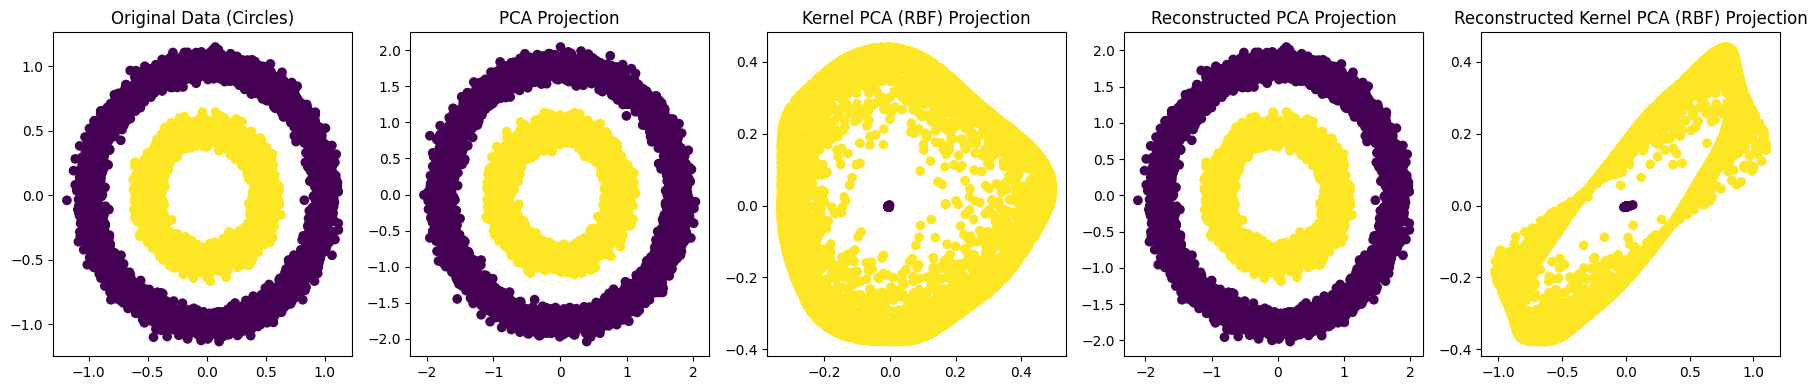

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler , PolynomialFeatures
from sklearn.kernel_approximation import RBFSampler
from sklearn.metrics import mean_squared_error

# Generate synthetic non-linear dataset (concentric circles)
X, y = make_circles(n_samples=10000, factor=0.5, noise=0.05, random_state=42)

# Create a very high-dimensional feature space
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X)

rbf_map = RBFSampler(gamma=15.0, n_components=300, random_state=42)
X_rbf = rbf_map.fit_transform(X)

rng = np.random.default_rng(42)
X_noise = rng.normal(size=(X.shape[0], 200))

X_high = np.hstack([X_poly, X_rbf, X_noise])

# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Apply Kernel PCA with RBF kernel
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15, fit_inverse_transform=True, random_state=42)
X_kpca = kpca.fit_transform(X_scaled)

# 6) Reconstruction
X_rec_pca = pca.inverse_transform(X_pca)
X_rec_kpca = kpca.inverse_transform(X_kpca)

# Plot Original Data, PCA, Kernel PCA, Reconstructed PCA, and Reconstructed Kernel PCA
plt.figure(figsize=(18, 4))
plt.subplot(1, 5, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title("Original Data (Circles)")

# Plot PCA
plt.subplot(1, 5, 2) # Changed subplot index
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title("PCA Projection")

# Plot Kernel PCA
plt.subplot(1, 5, 3)
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y, cmap='viridis')
plt.title("Kernel PCA (RBF) Projection")

# Plot reconstructed PCA
plt.subplot(1, 5, 4)
plt.scatter(X_rec_pca[:, 0], X_rec_pca[:, 1], c=y, cmap='viridis') # Changed to X_rec_pca for y-axis
plt.title("Reconstructed PCA Projection")

# Plot Kernel PCA
plt.subplot(1, 5, 5)
plt.scatter(X_rec_kpca[:, 0], X_kpca[:, 1], c=y, cmap='viridis')
plt.title("Reconstructed Kernel PCA (RBF) Projection") #here we


plt.tight_layout() # Adjust layout to prevent overlapping titles
plt.show()